In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import json
import pickle

<h3 style='font-weight:bold'>Data Load: Load house prices into a dataframe</h3>

In [2]:
df = pd.read_csv('house_prices.csv')
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
8221,Super built-up Area,Ready To Move,Sarjapur Road,3 BHK,PuineSu,1435,3.0,2.0,90.0
5343,Built-up Area,Ready To Move,HMT Layout,4 Bedroom,NaN,7500,4.0,NaN,425.0
2762,Built-up Area,17-Sep,HAL 2nd Stage,2 BHK,NaN,1226,3.0,1.0,135.0
6293,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,Solia D,1752,3.0,2.0,105.0
4551,Super built-up Area,Ready To Move,Budigere,1 BHK,PrityTr,722,1.0,0.0,46.0


In [3]:
df.shape

(13320, 9)

In [4]:
df.groupby("area_type")["area_type"].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

<h3 style='font-weight:bold'>Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations</h3>

In [5]:
print("locations : ", len(df.location.unique()))
print("societies : ", len(df.society.unique()))
print("availabilities : ", len(df.availability.unique()))

locations :  1306
societies :  2689
availabilities :  81


In [6]:
location_count = df.groupby("location")["location"].count().sort_values(ascending=False)
location_count

location
Whitefield             540
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1305, dtype: int64

In [7]:
len(location_count[location_count <= 10])

1064

In [8]:
location_under_20 = location_count[location_count <= 10]
df['location'] = df['location'].apply(lambda x : 'Other' if x in location_under_20 else x )

In [9]:
print("locations : ", len(df.location.unique()))

locations :  243


In [10]:
df = pd.concat([df,pd.get_dummies(df.location).drop("Other",axis='columns')],axis='columns')

In [11]:
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Devarachikkanahalli,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
4096,Super built-up Area,19-Dec,Kanakapura,2 BHK,GoityEt,1151,2.0,1.0,59.0,0,...,0,0,0,0,0,0,0,0,0,0
5997,Super built-up Area,Ready To Move,Malleshpalya,3 BHK,KencyRe,1430,2.0,1.0,69.5,0,...,0,0,0,0,0,0,0,0,0,0
9279,Super built-up Area,Ready To Move,Hennur Road,2 BHK,AdestAs,1153,2.0,1.0,43.0,0,...,0,0,0,0,0,0,0,0,0,0
8001,Super built-up Area,Ready To Move,Padmanabhanagar,2 BHK,Saalpas,1150,2.0,2.0,45.0,0,...,0,0,0,0,0,0,0,0,0,0
13032,Super built-up Area,18-Apr,Hosur Road,2 BHK,PuendWe,1223,2.0,1.0,93.0,0,...,0,0,0,0,0,0,0,0,0,0


<p style='font-weight:bold'>Drop features that are not required to build our model</p>

In [12]:
df = df.drop(["society", "availability"],axis='columns')

In [13]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h3 style='font-weight:bold'>Data Cleaning: Handle NA values</h3>

In [14]:
df.isna().sum()

area_type              0
location               1
size                  16
total_sqft             0
bath                  73
                      ..
Yelachenahalli         0
Yelahanka              0
Yelahanka New Town     0
Yelenahalli            0
Yeshwanthpur           0
Length: 248, dtype: int64

In [15]:
df = df.dropna()

In [16]:
df['rooms'] = df['size'].apply(lambda x: int(x.split()[0]))

In [17]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,rooms
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,0,0,0,...,0,0,0,0,0,0,0,0,0,2


<p style='font-weight:bold'>Drop features that are not required to build our model</p>

In [18]:
df = df.drop(["area_type", "size"], axis="columns")

In [19]:
df.sample(5)

,location,total_sqft,bath,balcony,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,rooms
11974,Hebbal,1252,2.0,1.0,92.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
12440,Bannerghatta Road,1846,3.0,2.0,120.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2970,Kudlu,1092,2.0,2.0,44.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2139,Prithvi Layout,1352,2.0,2.0,87.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9771,Sarjapur,2970,3.0,3.0,130.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


<p style='font-weight:bold'>Above shows that total_sqft can be a range (example : 2100-2850). For such case we can just take average of min and max value in the range.I am going to just drop the other cases to keep things simple</p>

In [20]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


def is_range(x):
    return  "-" in x

In [22]:
df = df[(df["total_sqft"].apply(is_float) | df["total_sqft"].apply(is_range))]

In [23]:
def to_values(x):
    if "-" in x:
        rng = x.split('-')
        return ( float(rng[0]) + float(rng[1]) ) / 2
    else:
        return float(x)


In [24]:
df["total_sqft"] = df["total_sqft"].apply(to_values)

In [25]:
df[~df["total_sqft"].apply(is_float)]

,location,total_sqft,bath,balcony,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,rooms


In [26]:
df.sample(5)

,location,total_sqft,bath,balcony,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,rooms
3807,Whitefield,1306.0,3.0,2.0,54.65,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3
2535,Yeshwanthpur,1826.0,3.0,2.0,165.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
8725,Attibele,418.0,2.0,1.0,11.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10741,Yelahanka,1491.0,3.0,2.0,85.00,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,3
4441,Electronics City Phase 1,1175.0,2.0,1.0,57.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [27]:
print("balcony :" ,df.balcony.unique())
print("rooms :" ,df.rooms.unique())
print("baths :" ,df.bath.unique())

balcony : [1. 3. 2. 0.]
rooms : [ 2  4  3  1  6  8  7  5 11  9 27 43 14 12 10 13]
baths : [ 2.  5.  3.  4.  1.  8.  7.  6.  9. 27. 11. 12. 10. 40. 15. 13.]


In [28]:
df["rooms"].value_counts()

2     5471
3     4641
4     1235
1      639
5      295
6      191
7       85
8       67
9       33
11       3
10       3
27       1
43       1
14       1
12       1
13       1
Name: rooms, dtype: int64

In [29]:
df = df[df["rooms"] <= 10]

In [30]:
df["bath"].value_counts()

2.0     6820
3.0     3134
4.0     1105
1.0      779
5.0      428
6.0      238
7.0       82
8.0       42
9.0       25
10.0       6
12.0       1
Name: bath, dtype: int64

In [31]:
df = df[df["bath"] <= 6]

In [32]:
print("balcony :", df.balcony.unique())
print("rooms :", df.rooms.unique())
print("baths :", df.bath.unique())

balcony : [1. 3. 2. 0.]
rooms : [2 4 3 1 6 5 7 8 9]
baths : [2. 5. 3. 4. 1. 6.]


In [33]:
df.shape

(12504, 247)

In [34]:
df.sample(5)

,location,total_sqft,bath,balcony,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,rooms
12858,Vidyaranyapura,1200.0,2.0,1.0,42.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6399,Electronic City,1210.0,2.0,2.0,25.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
5126,Kasavanhalli,2111.0,4.0,3.0,120.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2792,Rachenahalli,1204.0,2.0,3.0,38.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4024,Mallasandra,1325.0,2.0,1.0,70.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


<p style='font-weight:bold'>Add new feature called price per square feet</p>

In [35]:
df["price_by_sqft"] = df["price"] * 100000 / df["total_sqft"]
df.head()

,location,total_sqft,bath,balcony,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,rooms,price_by_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,4250.000000


In [36]:
def remove_ps_outliers(df):
    final_df = pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m = np.mean(subdf["price_by_sqft"])
        std = np.std(subdf["price_by_sqft"])
        filtered_df = subdf[
            (subdf["price_by_sqft"] > (m - std)) & (subdf["price_by_sqft"] <= (m + std))
        ]
        final_df = pd.concat([final_df, filtered_df], ignore_index=True)
    return final_df

In [37]:
df.shape

(12504, 248)

In [38]:
df = remove_ps_outliers(df)

In [39]:
df.shape

(10635, 248)

<p style='font-weight:bold'>Let's check if for a given location how does the 2 Rooms and 3 Rooms property prices look like</p>

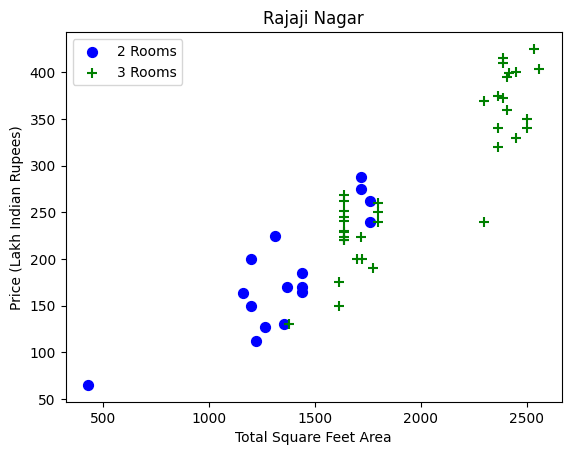

In [40]:
def plot_scatter_chart(df, location):
    room2 = df[(df.location == location) & (df.rooms == 2)]
    room3 = df[(df.location == location) & (df.rooms == 3)]
    
    plt.scatter(room2.total_sqft, room2.price, color="blue", label="2 Rooms", s=50)
    plt.scatter(
        room3.total_sqft, room3.price, marker="+", color="green", label="3 Rooms", s=50
    )
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()


plot_scatter_chart(df, "Rajaji Nagar")

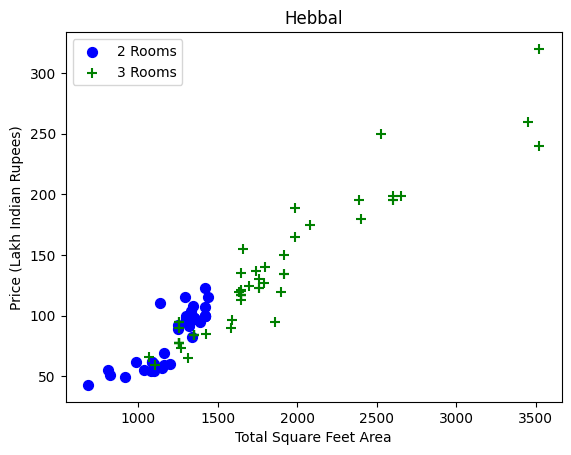

In [41]:
plot_scatter_chart(df, "Hebbal")

In [42]:
def remove_rooms_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("location"):
        rooms_stats = {}
        for room, rooms_df in location_df.groupby("rooms"):
            rooms_stats[room] = {
                "mean": np.mean(rooms_df.price_by_sqft),
                "std": np.std(rooms_df.price_by_sqft),
                "count": rooms_df.shape[0],
            }
        for room, rooms_df in location_df.groupby("rooms"):
            stats = rooms_stats.get(room - 1)
            if stats and stats["count"] > 5:
                exclude_indices = np.append(
                    exclude_indices,
                    rooms_df[rooms_df.price_by_sqft < (stats["mean"])].index.values,
                )
    return df.drop(exclude_indices, axis="index")


df = remove_rooms_outliers(df)

In [43]:
df.head()

,location,total_sqft,bath,balcony,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,rooms,price_by_sqft
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,3,4561.403509
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2,4540.654699


In [44]:
df = df.drop(["location", "price_by_sqft"],axis='columns')

In [45]:
df.sample(5)

,total_sqft,bath,balcony,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,rooms
601,1280.0,2.0,2.0,80.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
10583,1400.0,2.0,2.0,100.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
415,900.0,2.0,1.0,40.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9860,2400.0,4.0,3.0,200.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,4
5166,883.0,2.0,1.0,50.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


<h3 style='font-weight:bold'>Build The Model</h3>

In [46]:
X = df.drop('price',axis='columns')
y = df.price

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-0.2560585 , -0.48020863,  0.5806299 , ..., -0.03065285,
        -0.07250849, -0.57721986],
       [-0.32030182, -0.48020863,  0.5806299 , ..., -0.03065285,
        -0.07250849, -0.57721986],
       [-0.35884781, -0.48020863,  0.5806299 , ..., -0.03065285,
        -0.07250849, -0.57721986],
       [-0.03120688, -0.48020863,  0.5806299 , ..., -0.03065285,
        -0.07250849,  0.50508552],
       [-0.64537301, -0.48020863,  0.5806299 , ..., -0.03065285,
        -0.07250849, -0.57721986]])

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=24)

In [49]:
lr = LinearRegression()

In [50]:
lr.fit(X_train,y_train)

LinearRegression()

In [51]:
lr.score(X_test,y_test)

0.8245431182153

<h3 style='font-weight:bold'>Export the tested model to a pickle file</h3>

In [52]:
with open("house_prices_model.pickle", "wb") as f:
    pickle.dump(lr, f)

<h3 style='font-weight:bold'>Export location and column information to a file</h3>

In [53]:
columns = {"data_columns": [col.lower() for col in X.columns]}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))